<a href="https://colab.research.google.com/github/RLWH/tensorflow-certification-labs/blob/main/C2_W2_Lab_1_cats_v_dogs_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Data Augmentation

In the previous lessons, you saw that having a high training accuracy does not automatically mean having a good predictive model. 

It can still perform poorly on new data because it has overfit to the training set. In this lab, you will see how to avoid that using data augmentation. This increases the amount of training data by modifying the existing training data's properties. 

For example, in image data, you can apply different preprocessing techniques such as 
- rotate
- flip
- shear
- or zoom 

on your existing images so you can simulate other data that the model should also learn from. 

This way, the model would see more variety in the images during training so it will infer better on new, previously unseen data.

Let's see how you can do this in the following sections.

# Baseline Performance

You will start with a model that's very effective at learning Cats vs Dogs without data augmentation. It's similar to the previous models that you have used. 

Note that there are four convolutional layers with 32, 64, 128 and 128 convolutions respectively. The code is basically the same from the previous lab so we won't go over the details step by step since you've already seen it before.

You will train only for 20 epochs to save time but feel free to increase this if you want.

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-11-22 04:37:21--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   204MB/s    in 0.3s    

2022-11-22 04:37:21 (204 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Process the files
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./cats_and_dogs_filtered.zip')
zip_ref.extractall('tmp/')
zip_ref.close()

In [3]:
# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cat_dir = os.path.join(train_dir, 'cats')

# Directory with training dogs pictures
training_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cat_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dogs pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Now, we will write a function to initialise a model easily

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
    """
    Create a CNN model with 4 convolutional layers
    """

    model = tf.keras.models.Sequential([

        # First CNN layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Second CNN layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Third CNN layer
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Fourth CNN layer
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten layer
        tf.keras.layers.Flatten(),

        # Dense Layer
        tf.keras.layers.Dense(512, activation='relu'), # 512 neurons

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-4),
                  metrics=['accuracy'])

    return model

# Build the Image Generator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/.255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow the training images into the generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary' # This will be taken from the folder names
)

# Flow the validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size (20) * steps_per_epochs (100)
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50, # 1000 images = batch_size (20) * validation_steps (50)
    verbose=2
)

Epoch 1/20
100/100 - 10s - loss: 0.6894 - accuracy: 0.5360 - val_loss: 0.6773 - val_accuracy: 0.5910 - 10s/epoch - 97ms/step
Epoch 2/20
100/100 - 10s - loss: 0.6587 - accuracy: 0.6125 - val_loss: 0.6392 - val_accuracy: 0.6690 - 10s/epoch - 97ms/step
Epoch 3/20
100/100 - 9s - loss: 0.6064 - accuracy: 0.6745 - val_loss: 0.6262 - val_accuracy: 0.6570 - 9s/epoch - 88ms/step
Epoch 4/20
100/100 - 9s - loss: 0.5704 - accuracy: 0.7005 - val_loss: 0.5893 - val_accuracy: 0.6860 - 9s/epoch - 89ms/step
Epoch 5/20
100/100 - 9s - loss: 0.5434 - accuracy: 0.7125 - val_loss: 0.5911 - val_accuracy: 0.6910 - 9s/epoch - 94ms/step
Epoch 6/20
100/100 - 9s - loss: 0.5069 - accuracy: 0.7515 - val_loss: 0.5689 - val_accuracy: 0.7060 - 9s/epoch - 86ms/step
Epoch 7/20
100/100 - 9s - loss: 0.4888 - accuracy: 0.7685 - val_loss: 0.5583 - val_accuracy: 0.7210 - 9s/epoch - 86ms/step
Epoch 8/20
100/100 - 9s - loss: 0.4631 - accuracy: 0.7770 - val_loss: 0.5655 - val_accuracy: 0.7150 - 9s/epoch - 94ms/step
Epoch 9/20
1

You will then visualize the loss and accuracy with respect to the training and validation set. You will again use a convenience function so it can be reused later. This function accepts a History object which contains the results of the fit() method you ran above.

In [10]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

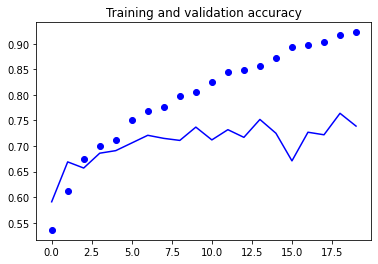

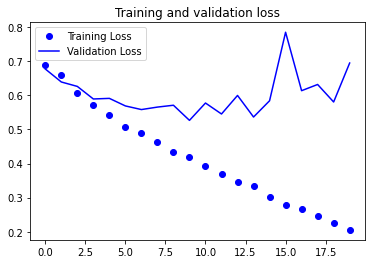

In [11]:
plot_loss_acc(history)

As we see from the plot, the training accuracy is over 90%. However, the validation accuracy is only around 70%. Clearly, the model is overfit. 

# Data Augmentation
One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if you tweak with the images a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy!

Here, we will be using `ImageDataGenerator` which we have been using to rescale the image. 

```
train_datagen = ImageDataGenerator(
	rescale=1./255,
	rotation_range=40,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True,
	fill_mode='nearest'
)
```

In [12]:
# Create a new model
model_for_aug = create_model()

In [15]:
# Setting up the new ImageDataGenerator with more augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [19]:
preview_images = next(train_generator)[0][0:8]

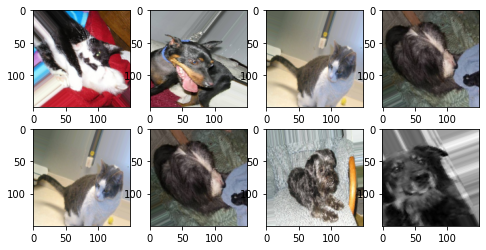

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(8, 4)

for i in range(2):
    for j in range(4):
        ax[i,j].imshow(preview_images[i * 2 + j])

In [ ]:
# Train the model with the new generators
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch=100, # 2000 images = batch_size (20) * steps_per_epochs (100)
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50, # 1000 images = batch_size (20) * validation_steps (50)
    verbose=2
)

Epoch 1/20
100/100 - 21s - loss: 0.6953 - accuracy: 0.5140 - val_loss: 0.6860 - val_accuracy: 0.5840 - 21s/epoch - 207ms/step
Epoch 2/20


In [ ]:
plot_loss_acc(history_with_aug)